In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
import datetime

In [40]:
start = input('Enter starting date in YYYY-MM-DD format')
year, month, day = map(int, start.split('-'))
date1 = datetime.date(year, month, day)

end = input('Enter ending date in YYYY-MM-DD format')
year, month, day = map(int, end.split('-'))
date1 = datetime.date(year, month, day)

stock = input("Enter stock name ")
data = yf.download(stock, start, end)

Enter starting date in YYYY-MM-DD format 2014-01-01
Enter ending date in YYYY-MM-DD format 2024-06-25
Enter stock name  NVDA


[*********************100%%**********************]  1 of 1 completed


In [41]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,0.398000,0.399500,0.393000,0.396500,0.396500,260092000
2014-01-03,0.397250,0.398000,0.390500,0.391750,0.391750,259332000
2014-01-06,0.395750,0.400000,0.392000,0.397000,0.397000,409492000
2014-01-07,0.401000,0.405000,0.398250,0.403500,0.403500,333288000
2014-01-08,0.405000,0.411000,0.403500,0.409000,0.409000,308192000
...,...,...,...,...,...,...
2024-06-17,132.990005,133.729996,129.580002,130.979996,130.979996,288504400
2024-06-18,131.139999,136.330002,130.690002,135.580002,135.580002,294335100
2024-06-20,139.800003,140.759995,129.520004,130.779999,130.779999,517768400


In [42]:
data.reset_index(inplace = True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,0.398000,0.399500,0.393000,0.396500,0.396500,260092000
1,2014-01-03,0.397250,0.398000,0.390500,0.391750,0.391750,259332000
2,2014-01-06,0.395750,0.400000,0.392000,0.397000,0.397000,409492000
3,2014-01-07,0.401000,0.405000,0.398250,0.403500,0.403500,333288000
4,2014-01-08,0.405000,0.411000,0.403500,0.409000,0.409000,308192000
...,...,...,...,...,...,...,...
2631,2024-06-17,132.990005,133.729996,129.580002,130.979996,130.979996,288504400
2632,2024-06-18,131.139999,136.330002,130.690002,135.580002,135.580002,294335100
2633,2024-06-20,139.800003,140.759995,129.520004,130.779999,130.779999,517768400
2634,2024-06-21,127.120003,130.630005,124.300003,126.570000,126.570000,655484700


In [43]:
movingavg_100_days = data.Close.rolling(50).mean()
movingavg_200_days = data.Close.rolling(100).mean()

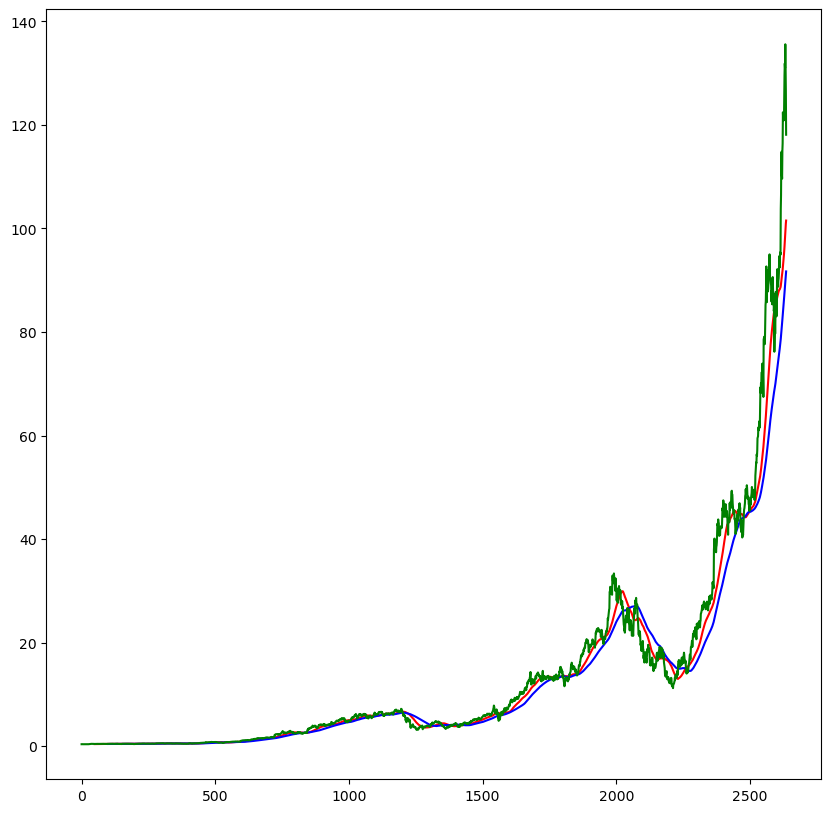

In [44]:
plt.figure(figsize=(10,10))
plt.plot(movingavg_100_days, 'r')
plt.plot(movingavg_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [45]:
data.dropna(inplace = True)

In [46]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.70)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.70): len(data)])

In [47]:
data_train.shape[0]

1845

In [48]:
data_test.shape[0]

791

In [49]:
scaler = MinMaxScaler(feature_range=(0,1))

In [50]:
data_train_scale = scaler.fit_transform(data_train)

In [51]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
x, y = np.array(x), np.array(y)

In [53]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [54]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [55]:
model.fit(x, y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 176ms/step - loss: 0.0586
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - loss: 0.0061
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 193ms/step - loss: 0.0072
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 193ms/step - loss: 0.0051
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - loss: 0.0041
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - loss: 0.0049
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - loss: 0.0043
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - loss: 0.0045
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - loss: 0.0040
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - loss: 0.0039
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - loss: 0.0035
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - loss: 0.0037
Epoch 13/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - loss: 0.0044
Epoch 14/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - loss: 0.0032
Epoch 15/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 172m

In [56]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [57]:
past_100_days = data_train.tail(100)

In [58]:
data_test = pd.concat([past_100_days, data_test], ignore_index=True)

In [59]:
data_test

,Close
0,13.606750
1,13.350000
2,12.930750
3,12.972250
4,13.013250
...,...
886,130.979996
887,135.580002
888,130.779999
889,126.570000


In [60]:
data_test_scale = scaler.fit_transform(data_test)

In [61]:
x = []
y = []
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [62]:
predict = model.predict(x)

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step


In [63]:
scale = 1/scaler.scale_

In [64]:
predict = predict*scale

In [65]:
y = y*scale

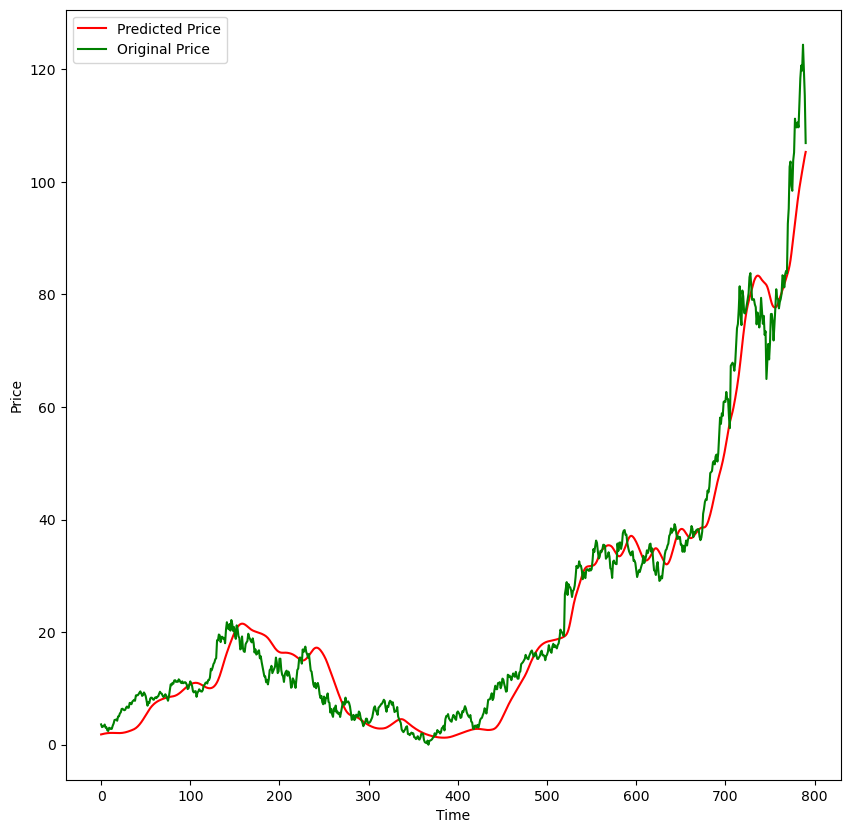

In [66]:
plt.figure(figsize=(10,10))
plt.plot(predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()